# Interactivity
In this code fraction, I plot an interactive barchart that by determining a criterion you can see the probability that the mean of each of bars are lower or higher of it

In [8]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import matplotlib as mpl

%matplotlib notebook

In [14]:
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [15]:
def margin_calculator(arr, confidence_level=0.95):
    sample_standard_error = scipy.stats.sem(arr)
    marg = sample_standard_error*stats.norm.ppf(confidence_level)
    return marg

In [16]:
margs = df.apply(margin_calculator,axis=1)
means = df.mean(axis=1)

In [17]:
floor = means - margs
ceil = means + margs

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


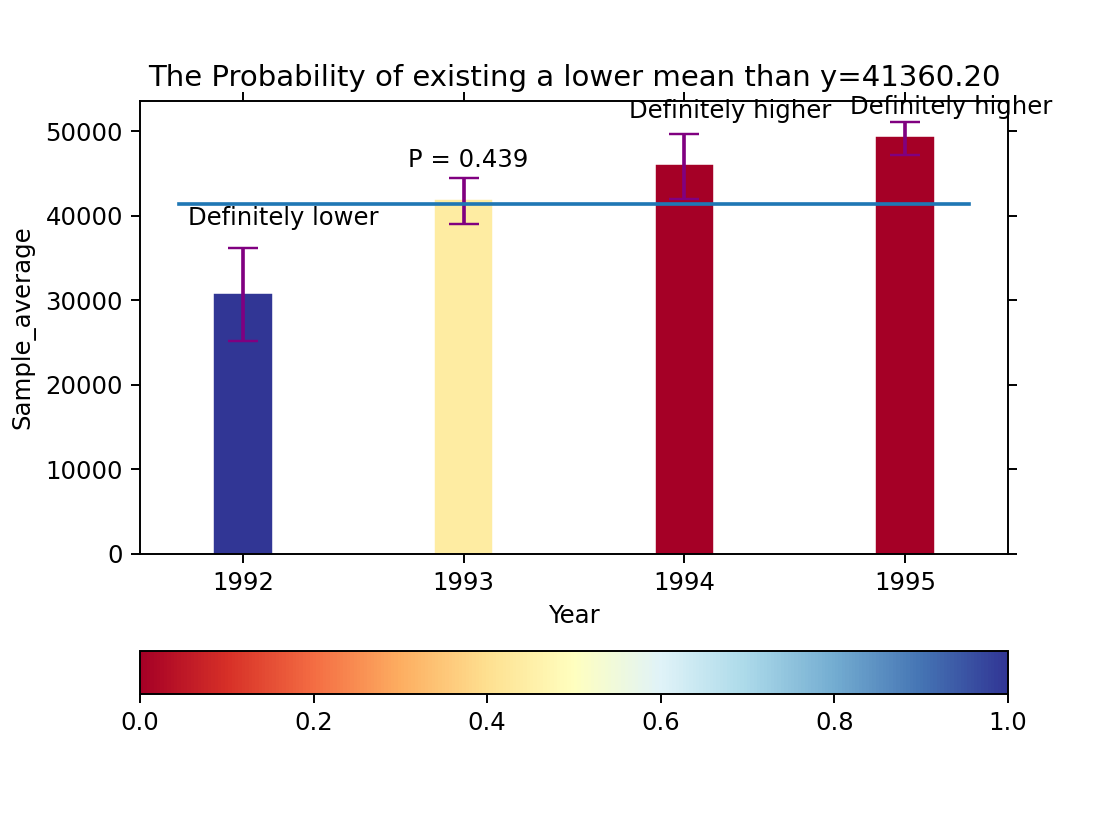

9

In [19]:
cmap = mpl.cm.get_cmap('RdYlBu')
color_pick = mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1.0))
plt.figure()
plt.bar(means.index, means, width = 0.25, yerr=margs, ecolor='purple',capsize=6)
plt.title('Choose a level for y to compare with the samples')
plt.xticks(ticks=[1992, 1993, 1994, 1995])
plt.xlabel('Year')
plt.ylabel('Sample_average')
color_bar = plt.colorbar(color_pick, orientation="horizontal")
def onclick(event):
    plt.cla()
    plt.bar(means.index, means, width = 0.25, yerr=margs, ecolor='purple',capsize=6)
    plt.xticks(ticks=[1992, 1993, 1994, 1995])
    plt.xlabel('Year')
    plt.ylabel('Sample_average')
    plt.gca().set_title('The Probability of existing a lower mean than y={:.2f}'.format(event.ydata))
    x = plt.gca().get_xlim()
    y = (event.ydata,event.ydata)
    plt.plot(x,y)
    distances = event.ydata - floor
    i = 1
    for barindex in means.index:
        norm = mpl.colors.Normalize(vmin=floor.loc[barindex], vmax=ceil.loc[barindex])
        plt.gca().get_children()[i].set_color(cmap(norm(event.ydata)))
        if (norm(event.ydata)>1):
            description = 'Definitely lower'
        elif (norm(event.ydata)<0):
            description = 'Definitely higher'
        else:
            description = f'P = {norm(event.ydata):.3f}'
        plt.annotate(description, [barindex-0.25,ceil.loc[barindex]+margs.loc[barindex]/2])
        i += 1
    

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [84]:
plt.savefig("A_comparison")